# Welcome to Lab 6: Backtracking

In this week's exercises, we will focus on two concepts both related to making your search smarter. One is backtracking which prevents the exploration of state-spaces that are incorrect. The other one is the possibility to keep exploring after you already returned a solution. This is very helpful if you want to incorporate your search algorithm inside a larger algorithm. Note, that this is optional and focuses mainly on broadening your programming skill. Throughout the exercise, you will be extending the classes by completing code stubs in their respective cells. You do not need to copy the code, it is enough to work in the cell under each exercise. Note that there are separate cells provided where you can (and should) test your code. During the exercises, you will (through customMagics) obtain a Python file (.py) which you should run against a set of unittests. Please avoid writing any unnecessary code in cells containing the `%%execwritefile` command. Doing this could alter the file `.py` and make it syntactically incorrect or interfere with the unittests. To prevent this stick to the following rules:'
 - ***Do not remove cells that start with ``%%execwritefile`` and do not remove that line.***
 - If a cell contains a `%%execwritefile` command at the top and a class definition you need to complete the given methods and adding helper methods is allowed, but do **not** add new functions or Python script to the cells (like global variables).
 - If a cell contains a `%%execwritefile` command at the top and **not** a class definition you must complete the given functions and you are free to add helper functions, new classes, and Python script that contains for example global variables. Note, that the use of global variables is almost always wrong except for a few use cases such as RNG for the numpy random generator methods.
 - If a cell does **not** contain a `%%execwritefile` command you can plot things, print variables, and write test cases. Here, you are free to do whatever you want.
 - If a cell does **not** contain a `%%execwritefile` command it should not contain functional code that is needed to run other functions or classes. The reason is that it is not copied to the `.py`. So, it can not be used during the unittesting.

You do not need to look at the `customMagic.py` nor do more than glimpse at the test file, your exercise is contained in this workbook unless specified differently in this notebook's instructions. 

***Hint: Jupyter Notebooks saves variables between runs. If you get unexpected results try restarting the kernel, this deletes any saved variables.*** 

Please fill in your student name down below

In [1]:
# FILL IN YOU STUDENT NUMBER
student = 3893995

# Set this to false if you want the default screen width.
WIDE_SCREEN = True

In [2]:
from custommagics import CustomMagics

if WIDE_SCREEN:
    import notebook
    from IPython.display import display, HTML

    if int(notebook.__version__.split(".")[0]) >= 7:    
        display(HTML(
            '<style>'
                '.jp-Notebook { padding-left: 1% !important; padding-right: 1% !important; width:100% !important; } '
            '</style>'
        ))
    else:
        display(HTML("<style>.container { width:98% !important; }</style>"))

get_ipython().register_magics(CustomMagics)

In [3]:
%%execwritefile exercise6_{student}_notebook.py 0 

# DO NOT CHANGE THIS CELL.
# THESE ARE THE ONLY IMPORTS YOU ARE ALLOWED TO USE:

import numpy as np
import copy
import networkx as nx
import matplotlib.pyplot as plt

RNG = np.random.default_rng()

Writing exercise6_3893995_notebook.py


In [4]:
plt.matplotlib.rcParams['figure.figsize'] = [6, 4]

# 1.0 Permutations Using Backtracking

In lab 4 question 2.0 (State-Space for Permutations), we did an exhaustive search on a state-space with only valid solutions. So, if we use backtracking to solve this state-space it would only change the algorithm by adding an extra if-statement that returns always true. Obviously, this is not very useful, however, in question 2.1 (Permutations with Replacement) of lab 4, we do have a state-space with incorrect solutions and now implementing backtracking could actually reduce the complexity compared to exhaustive search. 

Now, implement backtracking on the state-space defined as all the permutations with replacement. You can assume that all objects in the list are unique.

***Note, that to be able to do backtracking we need to give a list with the chosen items so far***

In [5]:
%%execwritefile exercise6_{student}_notebook.py 10 -a -s

class Permutations():
    def __call__(self, list_):
        """
        This method gives all the permutations of the list.
        This is done by generating all state-space but 
        using backtracking to ignore incorrect solution/solution branches.
        
        :param list_: The list containing all the unique elements.
        :type list_: list
        :return: A list with all possible permutations.
        :rtype: list[list[Objects]]
        """
        # All actions are the same, so it is helpful to make an object attribute.
        self.list = list_

        return self.step([])

    def step(self, chosen_list):
        """
        This method adds one value to the new permutated list and
        and calls next_step to generate a new set of actions.
        
        :param chosen_list: This list contains all objects chosen so far.
        :type chosen_list: list[Objects]
        :return: A list containing all the permutations, from the current space-state.
        :type: list[list[Objects]]
        """
        # If the permutation is correct, we can return it.
        if len(chosen_list) == len(self.list):
            return [chosen_list]

        # If the permutation is incorrect, we can return an empty list.
        if not self.is_not_incorrect(chosen_list):
            return []

        # If the permutation is not incorrect, we can generate the next step.
        return self.next_step(chosen_list, self.list)
        
    def next_step(self, chosen_list, chosen_object):
        """
        This method generates the actions that are possible for the next step and calls step with the updated state-space.
        These actions consist of all elements of the original list. 
        Note, that if you saved them as an object attribute this method does not do much.

        :param i: A counter how many elements are added to the new permutation.
        :type i: int
        :return: This method returns what self.step returns
        :type: list[list[Objects]]
        """
        # We need to make a copy of the list, so we can remove the object from the list.
        chosen_object = copy.deepcopy(chosen_object)
        permutations = []
        
        # We iterate over all objects in the list.
        for obj in chosen_object:
            # We remove the object from the list.
            chosen_object.remove(obj)
            # We add the object to the chosen list.
            new_chosen_list = copy.deepcopy(chosen_list)
            new_chosen_list.append(obj)
            # We call the next step with the new state-space.
            permutations += self.step(new_chosen_list)
            # We add the object back to the list.
            chosen_object.append(obj)
        
        return permutations
    
    def is_not_incorrect(self, chosen_list):
        """
        This method returns if the state-space is (partially) correct aka if it can become a permutation.

        :param chosen_list: A possible permutation of self.list
        :type chosen_list: list[Objects]
        :return: Return if the permutation variable is or is not a permutation.
        :rtype: boolean
        """
        # We check if the list is a permutation.
        return len(set(chosen_list)) == len(chosen_list)


Appending to exercise6_3893995_notebook.py


## Test your code

Below, you can test your backtrack algorithm for creating permutation using the class `Permutations`. 

In [6]:
# Type your testing code here
Permutations()([1, 2, 3])

[[1, 3, 1],
 [1, 3, 3],
 [1, 3, 3],
 [1, 3, 1],
 [1, 3, 3],
 [1, 3, 3],
 [3, 1, 1],
 [3, 1, 3],
 [3, 1, 3],
 [3, 1, 1],
 [3, 1, 3],
 [3, 1, 3]]

# 2.0 n-Queen Problem

In the lecture, you saw how the n-queen problem works and how it is coded using backtracking. Here, we will implement the constraints in two ways using the function we saw in the lecture and using the framework that we have been using since lecture 4. Below, you can also see a picture of how both algorithms are basically the same only in the framework we use more helper methods which makes each method smaller/simpler.

<img src="n_queens_def_vs_class.png" alt="drawing" width="1350"/>


In [7]:
%%execwritefile exercise6_{student}_notebook.py 20 -a -s

def constraint(queens, col):
    """
    The constraints for the n-queen problem

    :param queens: The currently placed queens.
    :type queens: list[int]
    :param col: The column that the queen is placed in.
    :type col: int
    :return: If the constraint is satisfied or not.
    :rtype: bool
    """
    row = len(queens)
    for r, c in enumerate(queens):
        if c == col or r - c == row - col or r + c == row + col:
            return False
    return True
       

def rec_nQueens(size, queens=None):
    """
    Recursively computes a solution for the n-Queens puzzle.

    :param size: The size of the puzzle
    :type size: int
    :param queens: The currently placed queens, e.g. [4,2] represent 
                   that on row 0 we placed a queen in the 4th position, 
                   and on row 1 we placed a queen in the 2nd position.
                   This defaults to [].
    :type queens: list[int], optional
    :return: The (partial) list of queen positions.
    :rtype: list[int]
    """
    if queens is None:
        queens = []
    
    if size <= len(queens):
        return queens
    
    for col in range(size):
        if constraint(queens, col):
            queens.append(col)
            candidate_sol = rec_nQueens(size, queens)
            if candidate_sol:
                return candidate_sol
            queens.pop()
    return False

class N_Queens():
    def __call__(self, size):
        """
        Recursively computes a solution for the n-Queens puzzle.
        
        size is not a recursive part of n-queens.
        So, we can store it in an object attribute.
        
        :param size:  The size of the puzzle
        :type size: int
        """
        self.size = size 
        return self.step([])

    def step(self, queens):
        """
        One step in solving the n-queens problem

        :param queens: The currently placed queens, e.g. [4,2] represent 
                       that on row 0 we placed a queen in the 4th position, 
                       and on row 1 we placed a queen in the 2nd position.
        :type queens: list[int]
        :return: The (partial) list of queen positions.
        :rtype: list[int]
        """
        if self.size <= len(queens):
            return queens
        
        for col in range(self.size):
            candidate_sol = self.next_step(queens, col)
            if candidate_sol:
                return candidate_sol
                
        self.clean_up(queens)
        return False
        
    def next_step(self, queens, col):
        """
        Check if you can go to the next step.
        
        :param queens: The currently placed queens, e.g. [4,2] represent 
                       that on row 0 we placed a queen in the 4th position, 
                       and on row 1 we placed a queen in the 2nd position.
        :type queens: list[int]
        :param col: The column that is tried to be added.
        :type col: int
        :return: The return of the step method
        :rtype: list[int]
        """
        if self.constraint(queens, col):
            queens.append(col)
            return self.step(queens)
        return False

    def clean_up(self, queens):
        """
        Clean up your previous division, in this case, remove the last queen of the board.
        """
        queens.pop()
    
    def constraint(self, queens, col):
        """
        Check if the constraints are satisfied.

        :param queens: The currently placed queens, e.g. [4,2] represent 
                       that on row 0 we placed a queen in the 4th position, 
                       and on row 1 we placed a queen in the 2nd position.
        :type queens: list[int]
        :param col: The column that is tried to be added.
        :type col: int
        :return: The return of the step method
        :rtype: list[int]
        """
        row = len(queens)
        for r, c in enumerate(queens):
            if c == col or r - c == row - col or r + c == row + col:
                return False
        return True 


Appending to exercise6_3893995_notebook.py


## Test your code

You can test your code below. Check if there is a difference between `N_Queens` and `rec_nQueens`.

In [8]:
# Write your tests here
N_Queens()(8)


[0, 4, 7, 5, 2, 6, 1, 3]

## 2.1 n-Rooks Problem

Above, we implemented the n-queen problem. However, by changing the constraints we can also solve the n-Rook problem.

Think about if this reduced state-space would also work for knights or any other chess pieces.

This also illustrates why solving these problems in classes is helpful. Not only do we not need to change the name of each helper function/method. We can also use inheritance to avoid coping the code and using inheritance we can only overwrite the method we want to overwrite.


In [9]:
%%execwritefile exercise6_{student}_notebook.py 25 -a -s

class N_rooks(N_Queens):
    def constraint(self, rooks, col):
        """
        Check if the constraints are satisfied.

        :param rooks: The currently placed rooks, e.g. [4,2] represent 
                       that on row 0 we placed a queen in the 4th position, 
                       and on row 1 we placed a queen in the 2nd position.
        :type rooks: list[int]
        :param col: The column that is tried to be added.
        :type col: int
        :return: The return of the step method
        :rtype: list[int]
        """
        return col not in rooks  

Appending to exercise6_3893995_notebook.py


## Test your code

Below test your code. Check your `rec_nrooks` works correctly.

In [10]:
N_rooks()(4)

[0, 1, 2, 3]

## 2.2 n-Queens Problem (all solutions)

While sometimes returning one solution is good enough, other times we do want to know all solutions. Here, we will change the step method of `N_Queens` to create `N_Qeens_All` which now returns all possibilities. Again, we can use inheritance to not change the other helper methods.

Hint: Sometimes clean-up is more difficult than just making copies.

Also, think about how you could do this for the n-rook problem, or did you already do this?

In [11]:
%%execwritefile exercise6_{student}_notebook.py 28 -a -s

class N_Queens_All(N_Queens):        
    def step(self, queens):
        """
        One step in solving the n-queens problem

        :param queens: The currently placed queens, e.g. [4,2] represent 
                       that on row 0 we placed a queen in the 4th position, 
                       and on row 1 we placed a queen in the 2nd position.
        :type queens: list[int]
        :return: The (partial) list of queen positions.
        :rtype: list[int]
        """
        if self.size <= len(queens):
            return [queens]
        
        solutions = []
        for col in range(self.size):
            candidate_sol = self.next_step(queens, col)
            if candidate_sol:
                solutions += candidate_sol
                
        self.clean_up(queens)
        return solutions

Appending to exercise6_3893995_notebook.py


## Test your code

You can test your code below. Check your `N_Queens_All` works correctly. Four queens should have two solutions.

In [12]:
N_Queens_All()(4)

[[1], [1]]

# Class Attribute vs Object Attributes

Just a short summary of the difference between class and object attributes. An object attribute is a variable inside an object that for each class instance (object) is unique. So far, you have only been working with object attributes. They are often declared inside the `__init__` and class object itself has no access to them. For example, take the class below:

```python
class Test():
    def __init__(self, value):
        self.value = value
```

So far you made an object of the class and then you could access the attribute value of this object, like this:

```python
test_obj = Test(10)
print(test_obj.value)
```

This works fine and prints the value `10`. However, the class object itself (`Test`) has no attribute `value` and can also not access it from its instances. So the following code does not work.
```python
Test.value
```
This will give the error `AttributeError: type object 'Test' has no attribute 'value'`.

However, the class object itself can have attributes. These are shared between all object instances and the class object. This could be helpful to store general information of a class or store metadata of a class such as how many class instances (objects) of this class are being used. Often in gaming, you see this where you have a class that creates enemy objects and one of the class attributes is the number of enemies. This makes sense because the total number of enemies should not change for each enemy object. This is also memory efficient as it is only stored once.

A class attribute is defined directly below the class. For example, in the next exercise, we will color a graph and the colors are stored in a class attribute like this:
```python
class Graph():
    colors = ['r', 'g', 'b']
```
Now, both the class itself and its instances can access this attribute. For example, the following code would print twice the list `['r', 'g', 'b']`.
```python
print(Graph.colors)
graph_obj = Graph()
print(graph_obj.colors)
```



# 3.0 Coloring Graphs

In this exercise, we will color the nodes of a graph, where the rules are simple two nodes that are connected with an edge can not have the same color. Often these problems require you to find the minimal number of colors to do this. However, to make it less programming work and still practice backtracking we will focus on the following question: "Can we color the graph with three colors, and if so give an example?".

We will use an adjacency list to represent the graph and a color list to represent the colors of each node. To wrap this all up needly we will use the `Graph` class which can be found below. Some functionality is already programmed. So take the time to see how this works. 

Your job is to finish the `color_the_graph` method. However, before you can start coloring the graph we need a way to add data to the `Graph` class. To do this you will use a setter, which is a method that makes sure, if you change an attribute of your class the rest of the attributes change accordingly. This prevents mistakes where for example the adjacency list is updated but not the color list. Setter are almost always named `set_....`.

In [13]:
%%execwritefile exercise6_{student}_notebook.py 30 -a -s

class Graph():
    """
    An undirected graph (not permitting loop) class with the ability to color the nodes using three colors ('r', 'g', or 'b'). 
    Two nodes that are connected through an edge can not have the same colors.

    Class attributes:
        :param colors: The possible colors to color the graph ('r', 'g', or 'b'). 
                       Note, you must use these strings otherwise the `show` method does not work.
        :type colors: list[str]
    
    Object attributes:
        :param adjacency_list: The representation of the graph.
        :type adjacency_list: dict[str/int, set[str/int]]
        :param color_list: A dictionary with as keys the nodes and as values the colors (R, G, B)
        :type color_list: dict[str/int, str]
    """
    colors = ['r', 'b', 'g']
    
    def __init__(self):
        """
        The graph is always initialized empty, use the `set_graph` method to fill it.
        """
        self.adjacency_list = {}
        self.color_list = {}

    @staticmethod
    def generate_random_graph():
        """
        This is a helper method to generate a random graph
        
        :return: This returns a random adjacency_list
        :rtype: dict[str/int, set[str/int]]
        """
        size = RNG.integers(3, 9)
        
        # add nodes
        adjacency_list = {i if RNG.choice([True, False]) else str(i): set() for i in range(size)}
        
        # Add random directed edges
        for node in adjacency_list.keys():
            adjacency_list[node] = set(i if i in adjacency_list else str(i) for i in RNG.choice(list(range(size)), size=RNG.integers(0.9*size)) if i not in [int(node), str(node)])
        # make the edges undirected
        for source, destinations in adjacency_list.items():
            for destination in destinations:
                adjacency_list[destination].add(source)
            
        return adjacency_list    

    def set_graph(self, adjacency_list):
        """
        This method sets the graph using as input an adjacency list.

        Hint: You need to change both the `adjacency_list` and the `color_list`. 
              Colors are by default None.

        :param adjacency_list: The representation of the graph.
        :type adjacency_list: dict[str/int, set[str/int]]
        """
        self.adjacency_list = adjacency_list
        self.color_list = {node: None for node in self.adjacency_list}

    def show(self):
        """
        This method shows the current graph.
        """
        n_vertices = len(self.adjacency_list)
        matrix = np.zeros((n_vertices, n_vertices))
        key_to_index = dict(zip(self.adjacency_list.keys(), range(n_vertices)))
        for vertex, edges in self.adjacency_list.items():
            for edge in edges:
                matrix[key_to_index[vertex], key_to_index[edge]] = 1
        
        graph = nx.from_numpy_array(matrix, create_using=nx.DiGraph)
        nx.draw_shell(graph,
                      labels=dict(enumerate(self.adjacency_list.keys())),
                      with_labels=True,
                      node_size=500,
                      width=2,
                      arrowsize=1,
                      node_color=[c if c is not None else 'grey' for c in self.color_list.values()])
        plt.show()

Appending to exercise6_3893995_notebook.py


## Test your code

You can test your code below. Check if your `set_graph` works correctly.

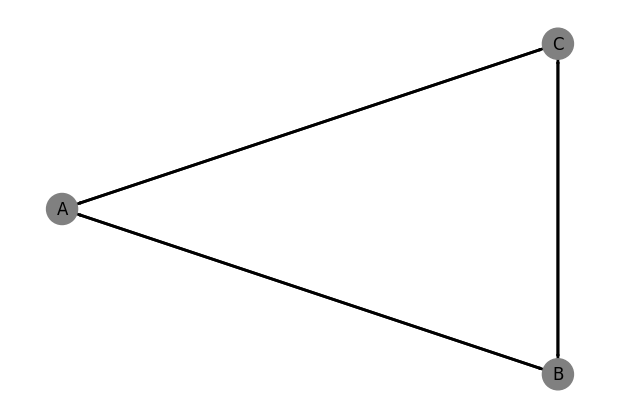

In [14]:
# Write your own test here.
graph = Graph()
graph.set_graph({'A': {'B', 'C'}, 'B': {'A', 'C'}, 'C': {'A', 'B'}})
graph.show()


## 3.1 Coloring Graphs

Here, you will write a backtracking algorithm to solve the coloring of the graph problem. Because `_step`, `_next_step`, and `_is_not_incorrect` are helper methods and should not be used outside this class they start with a `_`. You can ignore it as long as you do not forget that they start with an underscore.

Hint 1: To get a better idea of what is happening, you could show the graph each time you change the color of a node.

Hint 2: Again, cleaning up is often harder than copying state-spaces. It is recommended that you only clean up the `color_list`.

In [15]:
%%execwritefile exercise6_{student}_notebook.py 35 -a -s -c

class Graph(Graph):
    def color_the_graph(self):
        """
        This method colors the graph and returns if it was successful or not.

        :return: If the graph is colored
        :rtype: bool
        """
        nodes = list(self.adjacency_list.keys())
        return self._step(nodes)

    def _step(self, nodes):
        """
        One step in the coloring of the graph.

        :param nodes: A list of nodes that are not colored yet.
        :type nodes: list[int/str]
        """
        for node in nodes:
            for color in self.colors:
                self.color_list[node] = color
                if self._is_correct(node):
                    if self._next_step(nodes):
                        return True
            self._clean_up(node)
        return False

    def _clean_up(self, node):
        """
        If all possible actions in step fail, it makes sure that any decisions are undone.

        :param node: The current node that is being colored
        :type node: int/str
        """
        self.color_list[node] = None
    
    def _next_step(self, nodes):
        """
        This method can help to go to the next step and it makes sure that the nodes list is correct.
        
        :param nodes: A list of nodes that are not colored yet.
        :type nodes: list[int/str]
        """
        if not nodes:
            return True
        next_node = nodes.pop()
        return self._step(nodes)
    
    def _is_correct(self, node):
        """
        This method checks if node is colored correctly.
        
        :param node: The current node that is being colored
        :type node: int/str
        """
        for neighbor in self.adjacency_list[node]:
            if self.color_list[neighbor] == self.color_list[node]:
                return False
        return True

Appending to exercise6_3893995_notebook.py


## Test your code

You can test your code below. Check if your `color_the_graph` method works correctly.

The coloring of the graph succeded: True


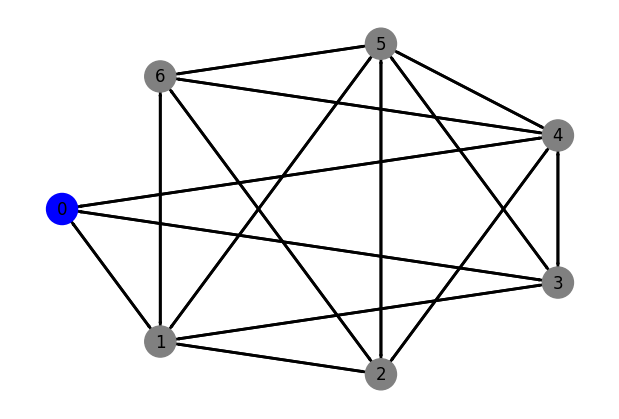

In [16]:
# Write your own test here.

graph = Graph()
graph.set_graph(Graph.generate_random_graph())
print(f"The coloring of the graph succeded: {graph.color_the_graph()}")
graph.show()

# 4.0 Search with Generators 

## ***All exercises below are additional content for extra practice, they only count for a small percentage of the bonus (TestExpert). So, you can skip to section [5.0 Unittests](#5.0-UNITTESTS) if you do not want to do these exercises.***

So, far we have seen several approaches to create solutions for a problem. We can create one solution or all solutions, use backtracking or exhaustive search, and use depth-first search or breath-first search. However, sometimes it is helpful if you can create one solutions and then create another one if needed. This is especially helpful if creating all solutions is not feasible. An example could be if need permutations to solve some other algorithm, but we do not know which permutation leads to a correct answer. Now, we could make all permutations but this is a bit expensive if the second permutation is the one that we need. Therefore, we can use generators in Python, which gives a the opportunity to first check if a certain permutation is correct before generating the next.

## 4.1 Yield Keyword

The `yield` keyword makes it possible to make a generator. `yield` is similar to `return` however if you call `next()` on an object that uses yield the code goes back to the `yield` statement and keeps running. So, this makes it possible to "go out" of a certain function and then go "back in". Let see how this works in an example.

```python
def func_a():
    print("function a")
    yield 1
    print("function a")
    yield 2

def func_b():
    generator_a = func_a()
    print(f"function b called next {next(generator_a)} times.")
    print(f"function b called next {next(generator_a)} times.")

func_b()
```

This code will print:
```
function a
function b called next 1 times.
function a
function b called next 2 times.
```

As you can see `func_b` can ask for a result of `func_a` and then do something before asking for another result of `func_a`. If you did see the function `next` before this is one of the main mechanisms behind  a for loop. So the example above would also work with a for loop. Thus, the code below would have exactly the same output as the code above.

```python
def func_a():
    print("function a")
    yield 1
    print("function a")
    yield 2

def func_b():
    for answer_a in func_a():
        print(f"function b called next {answer_a} times.")

func_b()
```

The final thing you need to understand is how `return` works in combination with `yield`. The simple answer is that `return` does not work normally because it will not return any value and it will just stop the generator. This can be seen in the code below. Note, that the print before `return` is executed.

```python
def func_a():
    print("function a")
    yield 1
    print("function a")
    return
    yield 2

def func_b():
    for answer_a in func_a():
        print(f"function b called next {answer_a} times.")

func_b()
```

The code above will print:
```
function a
function b called next 1 times.
function a
```

## 4.2 Permutation Generators

In this exercise, you will make again an algorithm that uses backtracking to create all permutations. However, this time you will make a generator that gives back one answer each time.

Hint: To stop the generator from creating certain state-spaces, you can use `return`.

***A Warning, working with yield in recursive functions can be extremely difficult!***

In [17]:
%%execwritefile exercise6_{student}_notebook.py 40 -a -s

class PermutationsGenerator(Permutations):
    def step(self, chosen_list):
        """
        This method adds one value to the new permutated list and
        and calls next_step to generate a new set of actions.
        
        :param chosen_list: This list contains all objects chosen so far.
        :type chosen_list: list[Objects]
        :return: A list containing all the permutations, from the current space-state.
        :type: list[list[Objects]]
        """
        # If the permutation is correct, we can return it.
        if len(chosen_list) == len(self.list):
            return [chosen_list]

        # If the permutation is incorrect, we can return an empty list.
        if not self.is_not_incorrect(chosen_list):
            return []

        # If the permutation is not incorrect, we can generate the next step.
        return self.next_step(chosen_list, self.list)

Appending to exercise6_3893995_notebook.py


## Test your code

You can test your code below. Check if your `PermutationsGenerator` class works correctly. You can print the content of a generator by using a for loop.

In [18]:
for sol in PermutationsGenerator()([1,2,3]):
    print(sol)

[1, 3, 1]
[1, 3, 3]
[1, 3, 3]
[1, 3, 1]
[1, 3, 3]
[1, 3, 3]
[3, 1, 1]
[3, 1, 3]
[3, 1, 3]
[3, 1, 1]
[3, 1, 3]
[3, 1, 3]


# 5.0 UNITTESTS

During this assignment, we copied all your code to the following **.py** file **"exercise6_{student}_notebook.py"**. You also tested your code along the way. However, it is possible that there are still a few errors. Therefore, it is good to run some unittest when you complete all coding. This gives you an extra chance to spot mistakes. Here, we added some unittest for you to use. Note, that they are merely a check to see if your **.py** is correct.

From this point onwards we strongly advise renaming the **"exercise6_{student}_notebook.py"** file to the correct file name that you need to hand in **"exercise6_{student}.py"**. Now, you can adjust the **"exercise6_{student}.py"** file without the risk of overwriting it when you run the notebook again. This also enables the possibility to run the unittests. Note, that from now on if you make a change in the Python file and you want to go back to the notebook later that you also make this change in the notebook. To run the unittests go to the **"unit_test.py"** file and run the file in either PyCharm, VSCode, or a terminal. You can run it in a terminal using the following command: `python -m unittest --verbose unit_test.py`. `--verbose` is optional but gives you more details about which tests fail and which succeed.

You are allowed to add your own unittests. 

## Uploading to Brightspace for Bonus

Next, you can upload your Python file with the correct name on brightspace in the bonus assignment. Follow the instructions on this brightspace page carefully to have a successful submission. After you get the feedback for this exercise you can either continue working in the Python file to fix possible bugs or you can go back to the notebook and remake the Python file. ***Please be careful, do not update your code in both the Python file and notebook at the same time!***. If you go back to the notebook do not forget to update the notebook with any changes you made within the Python file. In this case, it is best to just delete the Python file as soon as you copied all changes.

***NOTE, that you can now also upload the exercises from week 1! The process is exactly the same only there is no unittest.***